In [38]:
import os
import sys
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
def search_and_modify_file(file_path, search_string, modify_string):
    """
    Search for a string in a file and replace it with another string.
    """
    with open(file_path, 'r') as file:
        filedata = file.read()
    filedata = filedata.replace(search_string, modify_string)
    with open(file_path, 'w') as file:
        file.write(filedata)
        file.close()
    return


In [40]:
# modify metadata.csv to a csv file that can be parsed by pandas

search_and_modify_file('data/metadata.csv', '""', "'")
search_and_modify_file('data/metadata.csv', '","', '",')
search_and_modify_file('data/metadata.csv', '",', '","')

## parsed data in metadata_parsed.csv

In [41]:
df_meta = pd.read_csv('data/metadata_parsed.csv', delimiter=',"', names = ['timestamp', 'categories', 'participants', 'conversation_id']);

print(df_meta.shape)
print("Number of conversations: ", len(df_meta['conversation_id'].unique()))

(308, 4)
Number of conversations:  302


C:\Users\Simon Andersen\AppData\Local\Temp\ipykernel_1560\1392697386.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_meta = pd.read_csv('data/metadata_parsed.csv', delimiter=',"', names = ['timestamp', 'categories', 'participants', 'conversation_id']);


In [42]:
df_conv = pd.read_csv('data/data_new/data_conversations.csv')

N_conv = len(df_conv['id'].unique())
Nrows = df_conv.shape[0]

print('Number of conversations: ', N_conv)  
print('Number of rows in conversations.csv: ', Nrows)


Number of conversations:  1444
Number of rows in conversations.csv:  18994


In [43]:
# POSSIBLY SACK: drug_usage, smoking


#Imputate: average_fasting_glucose, alcohol_consumption, stress_level, weight, height

#Clever encoding of: activities,

#Possibly group: etchnicity, country_of_birth, state code, state_name

#Possibly make consistant and cut one of: state_code, state_name, average_sleep_duration v average_sleep_duration_hours


#Somehow fix: missing vals for average_sleep_duration_hours, 


In [44]:
#df_res = pd.read_csv('data/data_new/data_descriptives.csv')
df_res = pd.read_csv('data/descriptives.csv')


In [45]:
print(df_res.shape)
print(df_res.info())
print(df_res.describe())

(300, 44)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   patient_id                    271 non-null    object 
 1   name                          76 non-null     object 
 2   gender                        300 non-null    object 
 3   age                           300 non-null    int64  
 4   ethnicity                     300 non-null    object 
 5   country_of_birth              300 non-null    object 
 6   current_country_of_residence  300 non-null    object 
 7   weight                        299 non-null    object 
 8   height                        299 non-null    object 
 9   bmi                           299 non-null    float64
 10  average_daily_step_count      300 non-null    int64  
 11  average_sleep_duration        85 non-null     float64
 12  resting_heart_rate            300 non-null    int64  


In [48]:
(df_res['average_blood_glucose'] < 7).sum() / df_res.shape[0]

0.6866666666666666

In [ ]:
df = pd.read_csv('data/data_new/data_descriptives.csv')

# Drop columns that are uninformative
cols_to_drop = ['health_related_activities', 'name', 'patient_id', 'current_country_of_residence',\
     'conversation_id', 'diastolic', 'systolic', 'average_blood_pressure']  #smoking_status? drug_usage?
df_res = df.drop(cols_to_drop, axis=1)

# Replace _RARE_ with NaN and convert to float for weight, height
for col in ['weight', 'height']:
     df_res[col].replace('_RARE_', np.nan, inplace=True)
     df_res[col] = df_res[col].astype(float)


# Replace nan with Unknown for categorical variables
unknown_cols = ['number_of_children', 'smoking_status', 'specific_preferences', 'challenges', 'drug_usage']
for col in unknown_cols:
     df_res[col].replace(np.nan, 'Unknown', inplace=True)

# Replace 'Type 2 Diabetes' with 'Type 2 diabetes' for father
df_res['father'].replace('Type 2 Diabetes', 'Type 2 diabetes', inplace=True)


print(df_res.shape)
print(df_res.info())
print(df_res.describe())

KeyError: "['health_related_activities', 'conversation_id'] not found in axis"

In [ ]:
Nrows = df_res.shape[0]
for col in set(df_res.columns) - set(['nan', 'bmi', 'average_daily_step_count']):
    unique = df_res[col].unique();
    # calculate frequency of each value
    print("\n", col)
    for val in unique:
        if val not in ['nan']:
            N = len(df_res[df_res[col] == val])
            print(val, N, N/Nrows)
    print("NAN ", len(df_res[df_res[col].isna()]))



 unit
nan 0 0.0
mmHg 9 0.006198347107438017
mmol/L 7 0.0048209366391184574
NAN  1436

 diabetes_status
nan 0 0.0
Pre-diabetic 3 0.002066115702479339
NAN  1449

 status
nan 0 0.0
Normal 2 0.0013774104683195593
normal 2 0.0013774104683195593
pre-diabetic 2 0.0013774104683195593
Pre-diabetic 2 0.0013774104683195593
NAN  1444

 challenges
Emotional eating 72 0.049586776859504134
Avoiding processed foods 198 0.13636363636363635
Stress-related acid reflux triggers 1 0.0006887052341597796
Maintaining consistency 16 0.011019283746556474
nan 0 0.0
Lack of time to prepare meals 2 0.0013774104683195593
Adapting to new dietary restrictions 3 0.002066115702479339
Cravings for unhealthy snacks 16 0.011019283746556474
Avoiding sugary snacks 47 0.03236914600550964
Language barrier 16 0.011019283746556474
Sugar cravings 23 0.01584022038567493
Financial constraints 24 0.01652892561983471
Morning sickness during first trimester 1 0.0006887052341597796
Building muscle 1 0.0006887052341597796
Body conscio

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'average_daily_step_count'}>,
        <Axes: title={'center': 'average_sleep_duration'}>],
       [<Axes: title={'center': 'resting_heart_rate'}>,
        <Axes: title={'center': 'heart_rate_variability'}>,
        <Axes: title={'center': 'average_blood_glucose'}>],
       [<Axes: title={'center': 'average_fasting_glucose'}>,
        <Axes: title={'center': 'screen_time_per_day'}>,
        <Axes: title={'center': 'average_sleep_duration_hours'}>]],
      dtype=object)

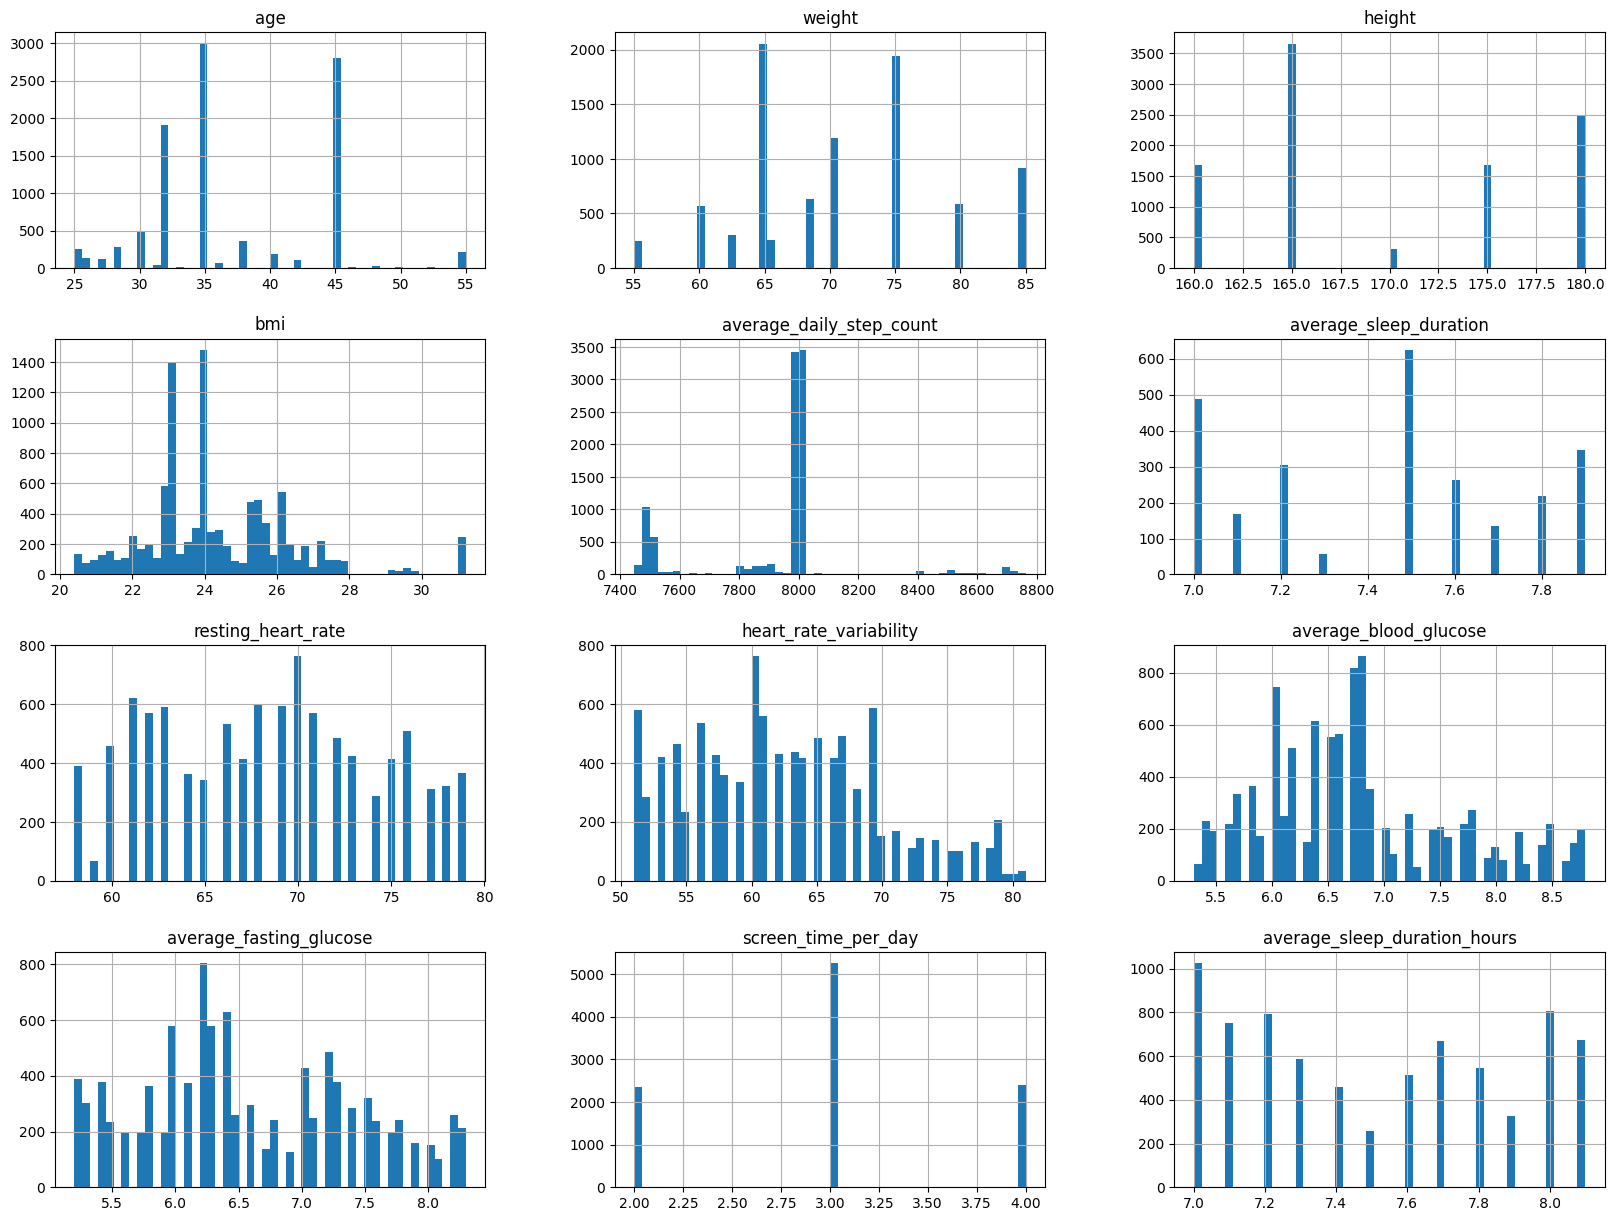

In [ ]:
df_res.hist(bins=50, figsize=(20,15))

In [ ]:
df = pd.read_csv('data/descriptives.csv')

# Drop columns that are uninformative
cols_to_drop = ['health_related_activities', 'name', 'patient_id', 'current_country_of_residence',\
     'conversation_id', 'average_sleep_duration', 'diastolic', 'systolic', 'state_code', 'drug_usage',\
           'average_blood_pressure'] #, 'diastolic', 'systolic', 'average_blood_pressure']  #smoking_status? drug_usage?
df_res = df.drop(cols_to_drop, axis=1)

# Replace _RARE_ with NaN and convert to float for weight, height
if 0:
     for col in ['weight', 'height']:
          df_res[col].replace('_RARE_', np.nan, inplace=True)
          df_res[col] = df_res[col].astype(float)

# Replace nan with Unknown for categorical variables
unknown_cols = ['number_of_children', 'smoking_status', 'specific_preferences', 'challenges',]
for col in unknown_cols:
    df_res[col].replace(np.nan, 'Unknown', inplace=True)

# Replace 'Type 2 Diabetes' with 'Type 2 diabetes' for father
df_res['father'].replace('Type 2 Diabetes', 'Type 2 diabetes', inplace=True)


print(df_res.shape)
print(df_res.info())
print(df_res.describe())

(300, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gender                        300 non-null    object 
 1   age                           300 non-null    int64  
 2   ethnicity                     300 non-null    object 
 3   country_of_birth              300 non-null    object 
 4   weight                        299 non-null    object 
 5   height                        299 non-null    object 
 6   bmi                           299 non-null    float64
 7   average_daily_step_count      300 non-null    int64  
 8   resting_heart_rate            300 non-null    int64  
 9   heart_rate_variability        300 non-null    float64
 10  average_blood_glucose         300 non-null    float64
 11  average_fasting_glucose       299 non-null    float64
 12  diet_type                     300 non-null    object 


In [ ]:
Nrows = df_res.shape[0]
for col in df_res.columns:
    unique = df_res[col].unique();
    # calculate frequency of each value
    print("\n", col)
    for val in unique:
        if val not in ['nan']:
            N = len(df_res[df_res[col] == val])
            print(val, N, N/Nrows)
    print("NAN ", len(df_res[df_res[col].isna()]))



 gender
Female 159 0.53
Male 141 0.47
NAN  0

 age
45 83 0.27666666666666667
32 60 0.2
28 16 0.05333333333333334
35 88 0.29333333333333333
24 1 0.0033333333333333335
40 10 0.03333333333333333
36 3 0.01
30 13 0.043333333333333335
25 4 0.013333333333333334
38 3 0.01
55 7 0.023333333333333334
57 1 0.0033333333333333335
42 4 0.013333333333333334
10 1 0.0033333333333333335
31 2 0.006666666666666667
20 1 0.0033333333333333335
22 1 0.0033333333333333335
65 2 0.006666666666666667
NAN  0

 ethnicity
Bulgarian 1 0.0033333333333333335
French 8 0.02666666666666667
Nigerian 4 0.013333333333333334
Japanese 9 0.03
Bangladeshi 1 0.0033333333333333335
Chinese 13 0.043333333333333335
Scottish 1 0.0033333333333333335
German 3 0.01
Indian 11 0.03666666666666667
Mexican 11 0.03666666666666667
Kenyan 3 0.01
Syrian 1 0.0033333333333333335
Egyptian 9 0.03
Russian 12 0.04
Asian 5 0.016666666666666666
British 4 0.013333333333333334
Norwegian 2 0.006666666666666667
Spanish 3 0.01
Canadian 2 0.006666666666666667